# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, gc, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import conf_pyspark, print_filesize, load_dataset
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)
dpi=80

import datetime
print (datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

2019-02-01 08:53:05


## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
publisher,Evening Post,Hawera & Normanby Star,Wanganui Chronicle,Otago Daily Times,Marlborough Express,Auckland Star,Poverty Bay Herald,Colonist,Ashburton Guardian,Grey River Argus,Thames Star,Feilding Star,Star,Wanganui Herald,Wairarapa Daily Times,Nelson Evening Mail,Otago Witness,Taranaki Herald,West Coast Times,Northern Advocate,North Otago Times,Bay Of Plenty Times,Daily Telegraph,Hawke's Bay Herald,Daily Southern Cross,Southland Times,Timaru Herald,Ellesmere Guardian,NZ Truth,Ohinemuri Gazette,Bruce Herald,Tuapeka Times,Observer,Bush Advocate,Mataura Ensign,Akaroa Mail and Banks Peninsula Advertiser,Clutha Leader,New Zealand Tablet,Manawatu Standard,Wellington Independent,"Rodney and Otamatea Times, Waitemata and Kaipara Gazette",Inangahua Times,Waikato Times,Manawatu Herald,Taranaki Daily News,Nelson Examiner and New Zealand Chronicle,Manawatu Times,Otautau Standard and Wallace County Chronicle,Lyttelton_Times,Te Aroha News,Hutt News,Kaipara and Waitemata Echo,New Zealand Spectator and Cook's Strait Guardian,New Zealand Free Lance,Waiapu Church Gazette,Oxford Observer,New Zealander,New Zealand Gazette and Wellington Spectator,Waimate Daily Advertiser,New Zealand Illustrated Magazine,Progress,Hawke's Bay Weekly Times,New Zealand Colonist and Port Nicholson Advertiser,Kai Tiaki,Fair Play,Waiapu Church Times,New Zealand Advertiser and Bay of Islands Gazette,Albertland Gazette
lines,3007465,807068,804226,747706,711069,674134,643505,638055,603346,574017,562647,467377,431855,420421,375253,343312,329016,328784,314293,290601,283063,246233,217769,216671,215102,211876,205144,182751,135108,133499,120432,116973,116157,101273,98941,96608,88108,79804,79269,76112,75831,70689,61250,59989,59712,51238,43499,40199,28911,26683,16138,15809,14283,14232,13733,9908,9886,5400,5037,4201,3216,1690,1650,1630,1180,245,184,112


Text(0.5, 0, 'File/Publisher')

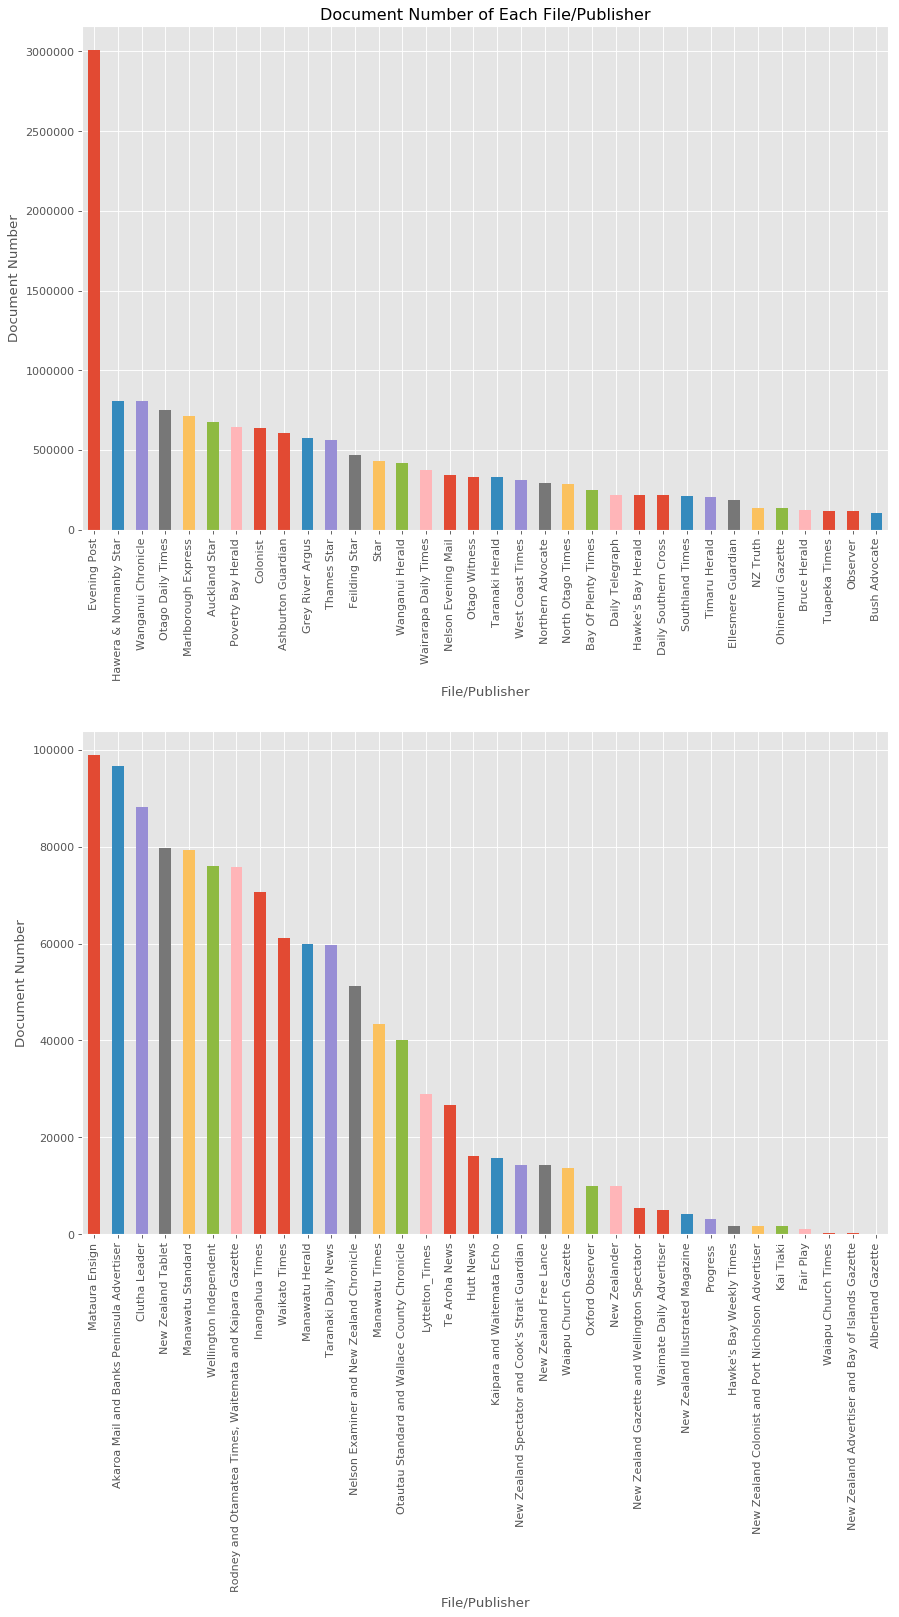

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 20), dpi=dpi)
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total **33** GB,
* total **68** files/publishers, 
* total **16,731,578** lines/samples/rows/documents, 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
# intiate PySpark
sc, spark = conf_pyspark()

sc

[('spark.driver.host', 'x99.hub'),
 ('spark.driver.port', '46878'),
 ('spark.app.name', 'local'),
 ('spark.driver.maxResultSize', '8g'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '6'),
 ('spark.app.id', 'local-1548964446782')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('raw', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


,id,url,publisher,time,title,content
0,11497854,http://api.digitalnz.org/records/11497854/source,Timaru Herald,1894-05-31T00:00:00.000Z,"Page 3 Advertisements Column 1 (Timaru Herald, 31 May 1894)","Japanese jugglers are deft smokers. Several of them will tit before a curtain, and from the tubacoo smoke which itto..."
1,12094972,http://api.digitalnz.org/records/12094972/source,Timaru Herald,1896-06-11T00:00:00.000Z,"Page 4 Advertisements Column 3 (Timaru Herald, 11 June 1896)",Business Notices. F ADIES ASK YOUR DRAPEK FOR TIMARU DRESS TWEEDS. Fxquisite m Design and Colouring and the BEST COL...
2,5169387,http://api.digitalnz.org/records/5169387/source,Timaru Herald,1877-05-16T00:00:00.000Z,"Page 2 Advertisements Column 3 (Timaru Herald, 16 May 1877)","New Advertisement «. IRONMONGERY, HARDWARE, ETC., THIS DAY, WEDNESDAY, 16th MAY, 1877. ivr oss jonas Is inttrutted b..."
3,5568379,http://api.digitalnz.org/records/5568379/source,Timaru Herald,1878-03-29T00:00:00.000Z,"Page 2 Advertisements Column 5 (Timaru Herald, 29 March 1878)","CRAWFORD, CLARK & CO. j /CRAWFORD, CLARK AND CO., AUCTIONEERS, STOCK AND STATION SALESMEN, Gbain and Peoduce Mebchan..."
4,34218119,http://api.digitalnz.org/records/34218119/source,Mataura Ensign,1911-05-09T12:00:00Z,Page 2 Advertisements Column 3 (Mataura Ensign 5-9-1911),A Hint to the Wise. A man is seldom sick when his bowels are regular and never well when they are irregular. Bear th...
5,29125712,http://api.digitalnz.org/records/29125712/source,Daily Telegraph,1896-06-17T00:00:00.000Z,"LATE CABLES. (Daily Telegraph, 17 June 1896)",LATE CABLES.THE CEICEET MATCH.AUSTRALIANS V. YORKSHIRE.PLAY STOPPED BY A THUNDERSTORM.[MB JPHOTB iBBOOIATIOH.âCOFI...
6,29169424,http://api.digitalnz.org/records/29169424/source,Daily Telegraph,1898-06-13T00:00:00.000Z,"THE CUBAN WAR (Daily Telegraph, 13 June 1898)","THE CUBAN WARSANTIAGO DE CUBA INVESTED.STARVATION RIFE.THE COST OF ""WAR.GERMANY MANOEUVRING TO EMBROIL EUROPE AND AM..."
7,29199137,http://api.digitalnz.org/records/29199137/source,Daily Telegraph,1900-07-11T00:00:00.000Z,"FOOTBALL. (Daily Telegraph, 11 July 1900)","FOOTBALL.The following referees have been appointed for next Saturday's matches :— Pirates I. v. Napier I. (3 p.m.),..."
8,27236351,http://api.digitalnz.org/records/27236351/source,Ellesmere Guardian,1933-11-09T00:00:00.000Z,"Page 5 Advertisements Column 2 (Ellesmere Guardian, 09 November 1933)","Considering the wet night, there was on Monday a good attendance at the play reading given by St. John's Guild, at w..."
9,11952606,http://api.digitalnz.org/records/11952606/source,North Otago Times,1895-05-10T00:00:00.000Z,"CHRISTCHURCH. May 9. (North Otago Times, 10 May 1895)","CHRISTCHURCH. May 9.Me Gilruth, Government veterinary surgeon, arrived at Lyitelton this morn* ing, for the purpose ..."


---

In [11]:
sc.stop()
gc.collect()

68